# Balanced Data Set

A dataset which has equal number of instances from each class is called balanced dataset. In the image below, i have used countplot on voice data to check if the dataset is balanced.
<img src='Balanced_dataset_example.png'>

There are equal number of data records (1584) for each class 'Male' and 'Female'.

# Imbalanced Dataset

A dataset where count of data records from each class is not equal. Below example is taken from c redit card fraud detection dataset where number of 'Fraud' classes is 492 and number of 'No Fraud' classes is 284315 
<img src='imbalanced_dataset.png'>

# What is problem with Imbalanced Dataset?

A machine learns from data on which it is being trained. Now if we train a machine learning model with 100 datapoints with class 1 and 10 datapoints with class 0, then it is obvious that the model learned more to classify datapoints with class 1. in that case there is very high probability that model will predict any future datapoints as class 1 than class 0. This is a serious problem with imbalanced dataset.We need to give a chance to model to learn both postive and negetive classes equally so that the prediction power of the model should not be biased.

# How to Deal with Imbalanced Data Set?

Lets first import 'Credit_Card_Fraud_Transactions.csv' to run examples

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

0    284315
1       492
Name: Class, dtype: int64


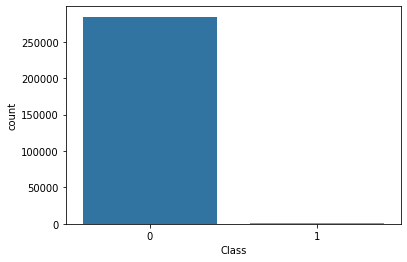

In [4]:
data = pd.read_csv('Credit_Card_Fraud_Transactions.csv')
print(data.Class.value_counts())
sns.countplot(data=data, x='Class')

we can see the credit card dataset is extremly imbalanced dataset where it has 492 fraud classes and 284315 no fraud classes.

## A. Using module 'imblearn'  

Python has a toolbox 'imblearn' to handle imbalanced data set. Before starting with imblearn let us understand two important concepts to be used by 'imblearn'.  

**Majority Class**: The class with highest number of data points.  
**Minority Class**: The class with lowest number of data points.

**Undersampling**: 
<img src='Undersampling.png'>
Datapoints belongs to majority class are being droped to adjust its count equal to count of datapoints from minority class.



**Oversampling**: 
<img src='Oversampling.png'>
Datapoints belongs to minority class are being duplicated to adjust its count equal to count of datapoints from majority class.

Lets implement both this approach in python

In [66]:
# First seperating features and target variable
X = data.drop('Class', axis=1)
Y = data.Class

**RandomOverSampling**

After Oversampling 

Total number of datapoints:  568630
Total number of fraud classes :  284315
Total number of no fraud classes :  284315


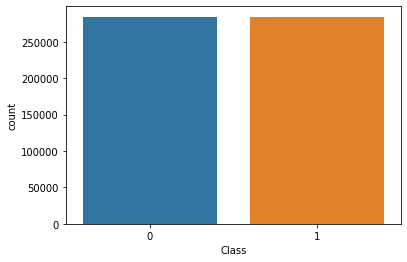

In [38]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
sampled_X, sampled_Y = ros.fit_sample(X,Y)

print('After Oversampling \n')
print('Total number of datapoints: ',sampled_Y.shape[0])
df = pd.DataFrame(sampled_Y, columns=['Class'])
print('Total number of fraud classes : ', df.Class.value_counts()[0])
print('Total number of no fraud classes : ', df.Class.value_counts()[1])
sns.countplot(data=df, x='Class')

> Now the data set is balanced where it has equal number of positive and negetive classes. Note that number of datapoints has been increased to 568630 . because datapoints have been duplicated from minority classes.  
**Drawback** of this approach is that too many redundant data have been added. thus increasing the size of the dataset.

**RandomUnderSampling**

After Undersampling 

Total number of datapoints:  984
Total number of fraud classes :  492
Total number of no fraud classes :  492


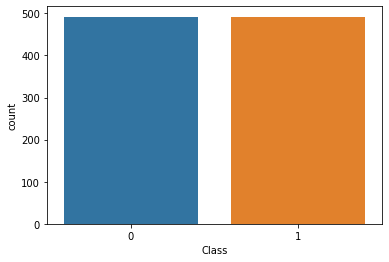

In [43]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
sampled_X, sampled_Y = ros.fit_sample(X,Y)

print('After Undersampling \n')
print('Total number of datapoints: ',sampled_Y.shape[0])
df = pd.DataFrame(sampled_Y, columns=['Class'])
print('Total number of fraud classes : ', df.Class.value_counts()[0])
print('Total number of no fraud classes : ', df.Class.value_counts()[1])
sns.countplot(data=df, x='Class')

> Data set is balanced now after RandomUnderSampling. Note that number of datapoints have been reduced to 984 . Because datapoints have been droped from majority class.  
**Drawback** of this technique is we are loosing information out of the dataset because datapoints have been droped.

**Tomek Links**

A Tomek’s link between two samples of different class x and y is defined such that for any sample z:

$d(x, y) < d(x, z)$  and  $d(x, y) < d(y, z)$

where d(.) is the distance between the two samples. In other words, a Tomek’s link exist if the two samples are the nearest neighbors of each other and are of opposite class.
<img src='Tomek_Links.png'>   
It is a Undersampling approach where samples from each tomek link is removed. We can select the 'sampling_strategy' to either 'auto' or 'all'. If **sampling_strategy='auto'** only the sample from the majority class will be removed. If **sampling_strategy='all'** both samples will be removed. Lets implement it.

In [67]:
from imblearn.under_sampling import TomekLinks
tmk = TomekLinks()
sampled_X , sampled_Y = tmk.fit_sample(X,Y)

After Undersampling 

Total number of datapoints:  284736
Total number of fraud classes :  284244
Total number of no fraud classes :  492


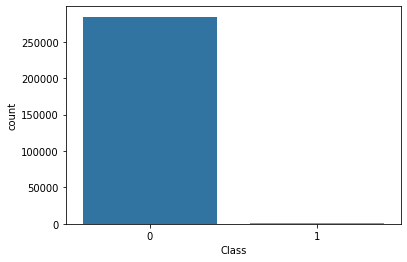

In [63]:
print('After Undersampling \n')
print('Total number of datapoints: ',sampled_Y.shape[0])
df = pd.DataFrame(sampled_Y, columns=['Class'])
print('Total number of fraud classes : ', df.Class.value_counts()[0])
print('Total number of no fraud classes : ', df.Class.value_counts()[1])
sns.countplot(data=df, x='Class')

**SMOTE (Synthetic Minority Oversampling TEchnique)**  

While the RandomOverSampler is over-sampling by duplicating some of the original samples of the minority class, SMOTE generate new samples in by interpolation. However, the samples used to interpolate/generate new synthetic samples differ.
Considering a sample $x_i$, a new sample $x_{new}$ will be generated considering its k neareast-neighbors.  

For instance, the 3 nearest-neighbors are included in the blue circle as illustrated in the figure below. Then, one of these nearest-neighbors $x_{zi}$ is selected and a sample is generated as follows:
    $x_{new}$ = $x_{i} + \lambda \times (x_{zi} - x_i)$  
    
where $\lambda$ is a random number in the range [0, 1]. This interpolation will create a sample on the line between $x_{i}$ and $x_{zi}$ as illustrated in the image below:

<img src='SMOTE.png'>  

Lets see how to implement it,

After Undersampling 

Total number of datapoints:  568630
Total number of fraud classes :  284315
Total number of no fraud classes :  284315


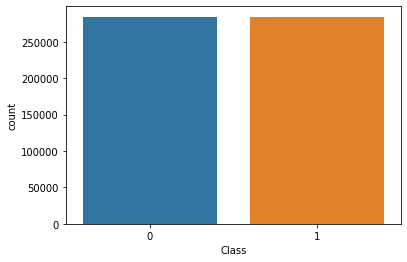

In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
sampled_X, sampled_Y = smote.fit_sample(X, Y)

print('After Undersampling \n')
print('Total number of datapoints: ',sampled_Y.shape[0])
df = pd.DataFrame(sampled_Y, columns=['Class'])
print('Total number of fraud classes : ', df.Class.value_counts()[0])
print('Total number of no fraud classes : ', df.Class.value_counts()[1])
sns.countplot(data=df, x='Class')

## B. Using class_weight attribute of each algorithm  

so far whatever approaches we have learned , has some drawbacks as explained before. Now we will see more authentic way of handling imbalnaced dataset.  

sklearn provides an attribute **'class_weight'** in each algorithm's class constructor which can be set to handle imbalanced dataset. lets learn more about that.  

from sklearn documentation,

class_weight value can be either a dictionary object or 'balanced' or 'none'. Default value is 'none'.

**when class_weight == 'balanced'**  
it uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as $n_{samples}$ / $(n_{classes}$ * $np.bincount(y))$.  


In [82]:
n_samples = X.shape[0]
n_classes = data.Class.nunique()
print('np.bincount(y) : ', np.bincount(Y))
print('Number of Samples : ', n_samples)
print('Number of Classes : ', n_classes)

class_weight = X.shape[0] / ( n_classes * np.bincount(Y))
print('Class  Weight : ', class_weight)

np.bincount(y) :  [284315    492]
Number of Samples :  284807
Number of Classes :  2
Class  Weight :  [  0.50086524 289.43800813]


> So we can see for the credit card transaction, class_weight is {'No Fraud' : 0.50, 'Fraud' : 289}. which means whenever the model learns 'Fraud' class it assigns more weitage of 289.43 and when model learns 'No Fraud' class i gives less weightage of 0.50 for it.

**when class_weight == dict pbject**  
Dictionary to be given where keys are classes and values are corresponding class weights.If not given, all classes are supposed to have weight one.

In [85]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(class_weight={0:0.5, 1:1})

> In the above piece of code we passed class_weight to LogisticRegression classifier model. and the weight 0.5 is associated with Class 0('No Fraud') and weight 1 is associated with class 1('Fraud'). It means model would give more weightage to Class 1.

**when class_weight == none**  
If None is given, the class weights will be uniform.